# Algebrigian Forest Fire DataSets

# Dataset information
- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.

- The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

# Dataset columns:

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

- RH : Relative Humidity in %: 21 to 90

- Ws :Wind speed in km/h: 6 to 29

- Rain: total day in mm: 0 to 16.8 FWI Components

- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

- Drought Code (DC) index from the FWI system: 7 to 220.4

- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

- Buildup Index (BUI) index from the FWI system: 1.1 to 68

- Fire Weather Index (FWI) Index: 0 to 31.1

- Classes: two classes, namely Fire and not Fire

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [79]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [81]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


# Data Cleaning

In [82]:
# Check missing Value

dataset[dataset.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The datasets is converted into two sets based on region from 122th index, We can make a newe column based on the region

1: "Bejala Region Dataset"

2: "Sidi -Bel AbbesResion Datasets"

Add new Column with region

In [83]:
# Add a new Column 
dataset.loc[:122,"Region"] = 0
dataset.loc[122: "Region"] = 1
df =  dataset

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          247 non-null    object 
 1   month        247 non-null    object 
 2   year         247 non-null    object 
 3   Temperature  247 non-null    object 
 4    RH          247 non-null    object 
 5    Ws          247 non-null    object 
 6   Rain         247 non-null    object 
 7   FFMC         247 non-null    object 
 8   DMC          247 non-null    object 
 9   DC           247 non-null    object 
 10  ISI          247 non-null    object 
 11  BUI          247 non-null    object 
 12  FWI          247 non-null    object 
 13  Classes      247 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [85]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [86]:
# change the data type of added  new column float to int 
df[["Region"]] = df[["Region"]].astype(int)

In [87]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [88]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
243,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
244,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
245,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
246,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

- There is nothing any null value is present in any column of (Feature)

In [90]:
# Removing the null Values

df = df.dropna().reset_index(drop = True)

In [91]:
# then we analysis the each record of the datasets 
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [92]:
# There is no wrong info record is present in datasets
# if present any perticuler record as is not important then remove it like as follow

# for e.g
# df= df.dropna(122).reset_index(drop = True)

In [93]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [94]:
# Fix the spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          247 non-null    object
 1   month        247 non-null    object
 2   year         247 non-null    object
 3   Temperature  247 non-null    object
 4   RH           247 non-null    object
 5   Ws           247 non-null    object
 6   Rain         247 non-null    object
 7   FFMC         247 non-null    object
 8   DMC          247 non-null    object
 9   DC           247 non-null    object
 10  ISI          247 non-null    object
 11  BUI          247 non-null    object
 12  FWI          247 non-null    object
 13  Classes      247 non-null    object
 14  Region       247 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.1+ KB


- Change  the required columns into integer data type

In [96]:
df[["month","day","year","Temperature","RH","Ws"]] = df[["month","day","year","Temperature","RH","Ws"]].astype(int)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          247 non-null    int64 
 1   month        247 non-null    int64 
 2   year         247 non-null    int64 
 3   Temperature  247 non-null    int64 
 4   RH           247 non-null    int64 
 5   Ws           247 non-null    int64 
 6   Rain         247 non-null    object
 7   FFMC         247 non-null    object
 8   DMC          247 non-null    object
 9   DC           247 non-null    object
 10  ISI          247 non-null    object
 11  BUI          247 non-null    object
 12  FWI          247 non-null    object
 13  Classes      247 non-null    object
 14  Region       247 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 29.1+ KB


In [98]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [99]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [100]:
#converting all the Objects type to Float type
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          247 non-null    int64  
 1   month        247 non-null    int64  
 2   year         247 non-null    int64  
 3   Temperature  247 non-null    int64  
 4   RH           247 non-null    int64  
 5   Ws           247 non-null    int64  
 6   Rain         247 non-null    float64
 7   FFMC         247 non-null    float64
 8   DMC          247 non-null    float64
 9   DC           247 non-null    float64
 10  ISI          247 non-null    float64
 11  BUI          247 non-null    float64
 12  FWI          247 non-null    float64
 13  Classes      247 non-null    object 
 14  Region       247 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 29.1+ KB


In [102]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [103]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,8.287449,4.210526,994.287449,15.906883,34.080972,8.408907,0.922267,37.389069,6.588664,26.763563,2.311741,8.125506,3.261134,0.506073
std,9.648832,3.348979,1007.467308,15.297970,34.453125,7.775744,1.691499,38.487785,9.729000,44.738634,2.502288,12.461229,5.004976,0.500978
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,15.500000,7.000000,2012.000000,31.000000,67.500000,15.500000,1.000000,80.500000,9.050000,33.600000,2.600000,11.000000,2.800000,1.000000
max,31.000000,9.000000,2012.000000,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.000000


In [104]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [105]:
## Let save the clean datasets
df.to_csv('Algerian_forest_fires_cleaned_datasets.csv',index = False)

# Exploratory Data Analysis

In [106]:
## drop the day, month and year

df_copy = df.drop(['day','month','year'],axis = 1)

In [107]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [108]:
df_copy["Classes"].value_counts()

1              125
not fire        60
fire            53
fire             4
fire             2
not fire         2
not fire         1
Name: Classes, dtype: int64

In [109]:
## Encoding of the categotical in classes
df_copy["Classes"] = np.where(df_copy["Classes"].str.contains('not fire'),0,1)

In [110]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [111]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
243,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
244,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
245,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1
246,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1


In [112]:
df_copy["Classes"].value_counts()

0    188
1     59
Name: Classes, dtype: int64

In [113]:
## Make sum Visualixzation using Seaboarn

/tmp/ipykernel_1313/349846018.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


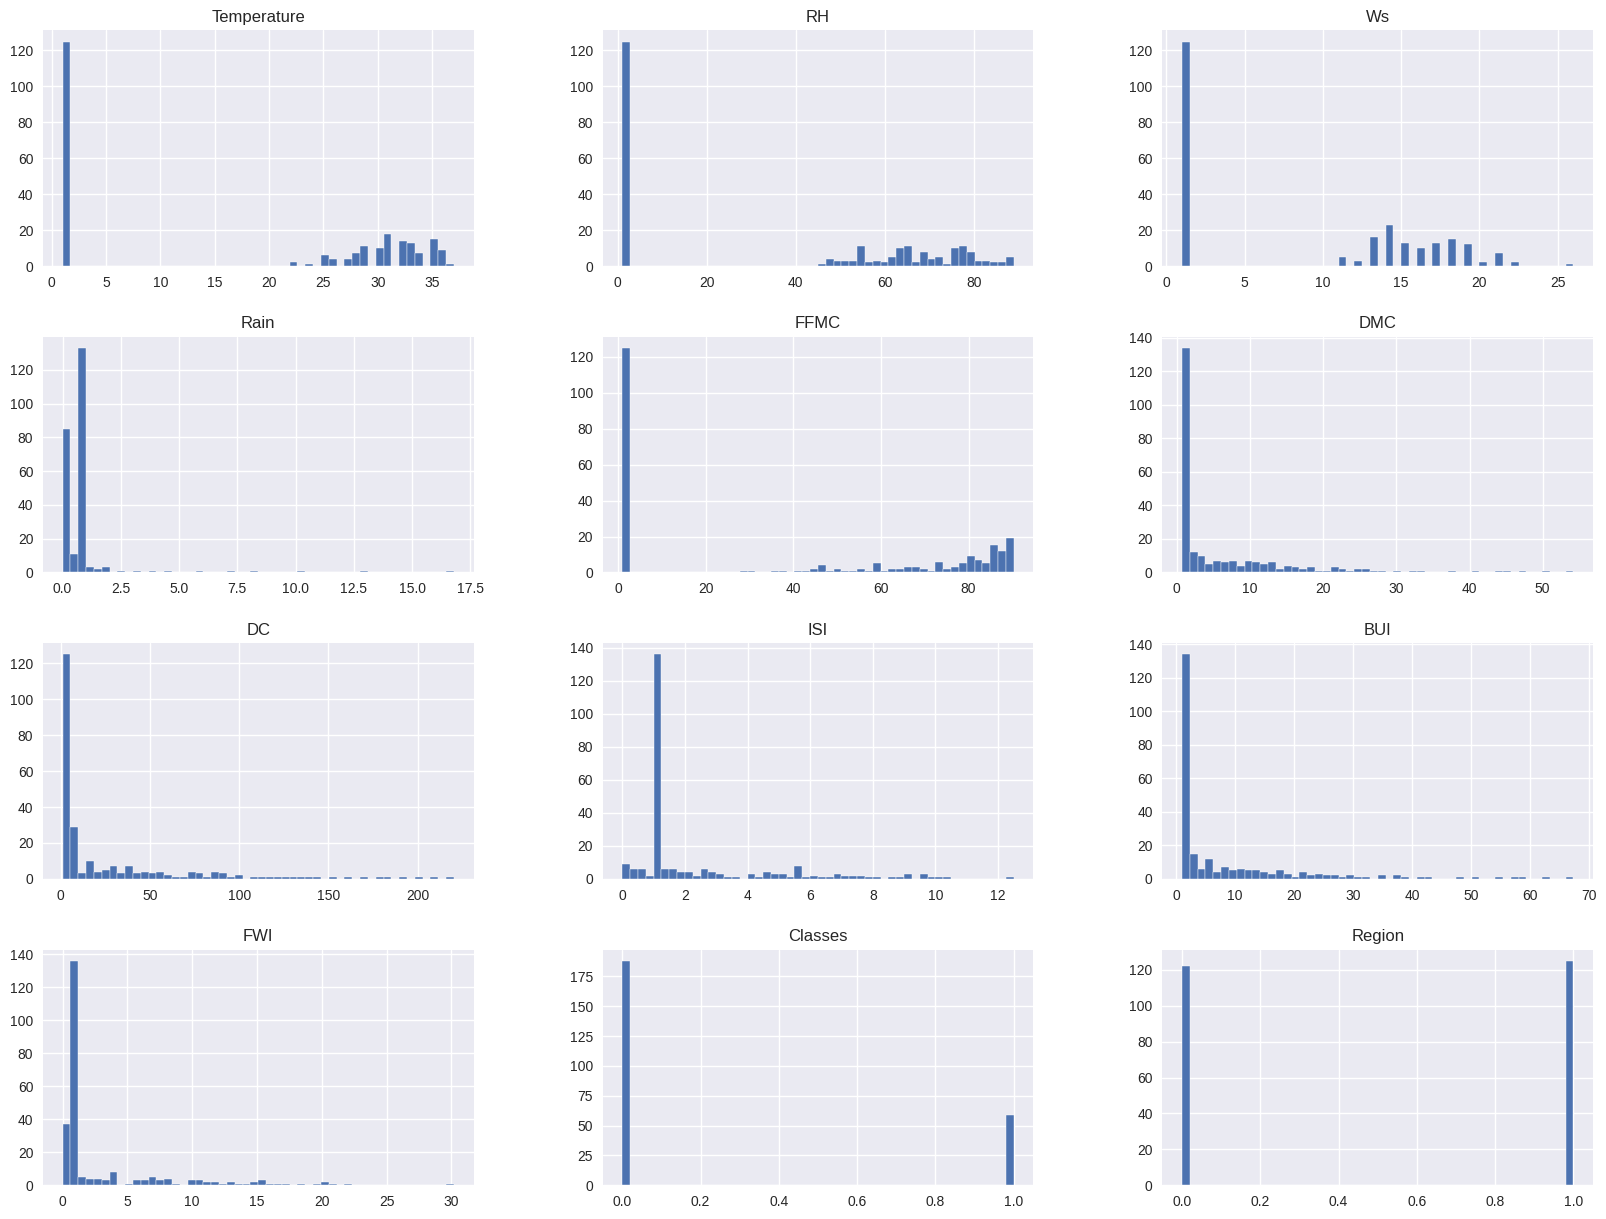

In [114]:
plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize=(20,15))
plt.show()

In [115]:
## Percentage for Pie Chart
percentage = df_copy["Classes"].value_counts(normalize = True)*100

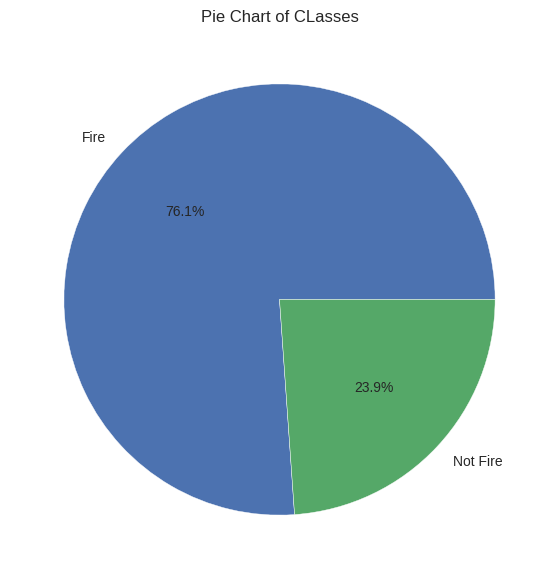

In [116]:
## Ploting Piechart

classlabels = ["Fire","Not Fire"]
plt.figure(figsize = (12,7))
plt.pie(percentage,labels = classlabels ,autopct = '%1.1f%%')
plt.title("Pie Chart of CLasses")
plt.show()

# Correlation 

In [117]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,0.939713,0.946243,-0.120112,0.980092,0.642836,0.643119,0.611092,0.640456,0.535200,0.622860,-0.988346
RH,0.939713,1.000000,0.955522,0.029265,0.891873,0.503365,0.510912,0.405042,0.502265,0.350178,0.481670,-0.973880
Ws,0.946243,0.955522,1.000000,0.044614,0.911394,0.571299,0.585174,0.505303,0.573527,0.449610,0.522317,-0.966425
Rain,-0.120112,0.029265,0.044614,1.000000,-0.207111,-0.242599,-0.257212,-0.334783,-0.248333,-0.281428,-0.301565,0.046611
FFMC,0.980092,0.891873,0.911394,-0.207111,1.000000,0.698942,0.692496,0.699597,0.694919,0.609663,0.717443,-0.958968
DMC,0.642836,0.503365,0.571299,-0.242599,0.698942,1.000000,0.975057,0.826103,0.997049,0.918398,0.743392,-0.582634
DC,0.643119,0.510912,0.585174,-0.257212,0.692496,0.975057,1.000000,0.803866,0.988451,0.895250,0.724641,-0.584089
ISI,0.611092,0.405042,0.505303,-0.334783,0.699597,0.826103,0.803866,1.000000,0.823594,0.954313,0.881765,-0.531700
BUI,0.640456,0.502265,0.573527,-0.248333,0.694919,0.997049,0.988451,0.823594,1.000000,0.917730,0.739914,-0.579977
FWI,0.535200,0.350178,0.449610,-0.281428,0.609663,0.918398,0.895250,0.954313,0.917730,1.000000,0.816071,-0.458227


/tmp/ipykernel_1313/2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot: >

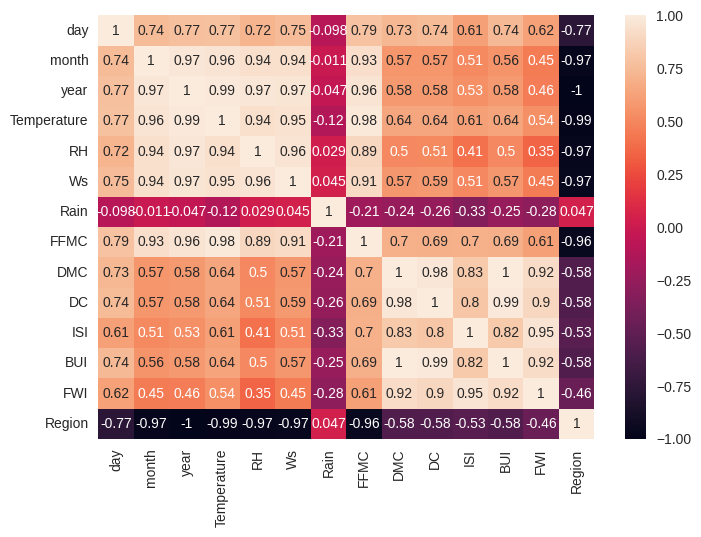

In [118]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot: >

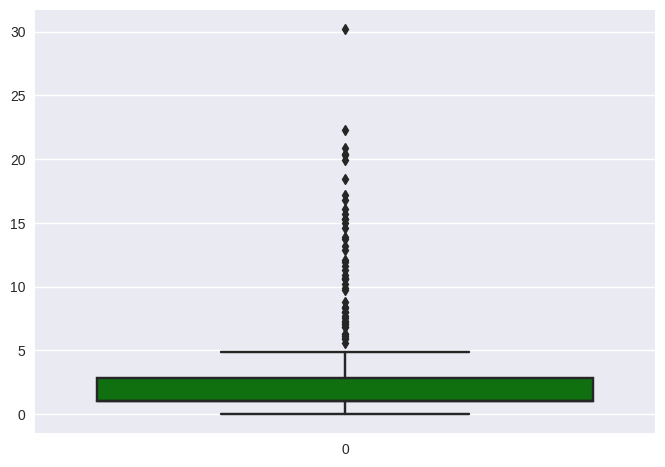

In [119]:
## Box Plot
sns.boxplot(df['FWI'],color='green')

In [120]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [121]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),"not fire","fire")

Text(0.5, 1.0, 'Fire Analysis of sidi- Bel Regions')

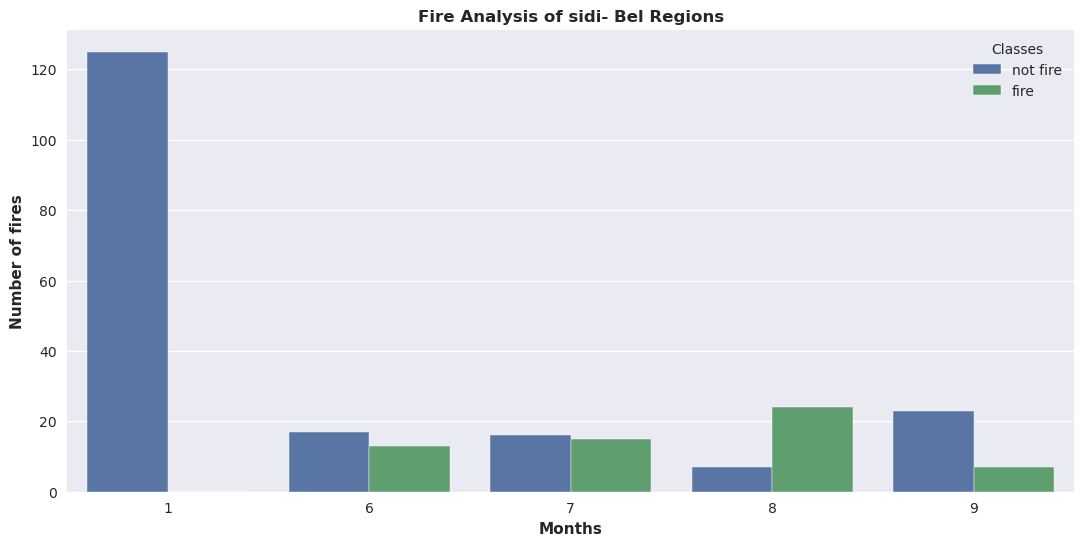

In [122]:
## monthly fire analysis

dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize= (13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue ='Classes',data = df)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Months",weight = "bold")
plt.title("Fire Analysis of sidi- Bel Regions",weight = "bold")

Text(0.5, 1.0, 'Fire Analysis of Bejala Region')

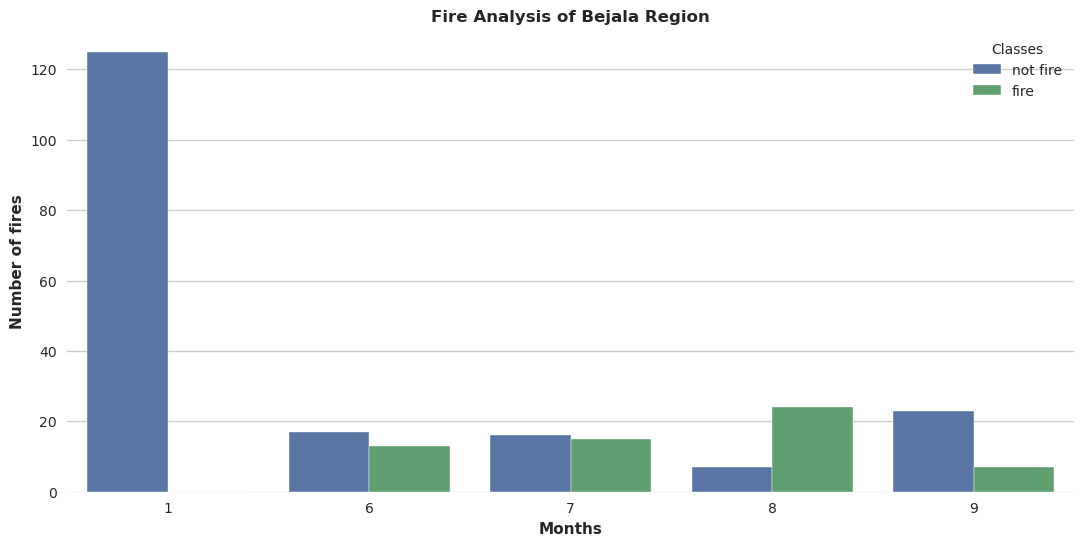

In [123]:
## monthly fire analysis

dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize= (13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue ='Classes',data = df)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Months",weight = "bold")
plt.title("Fire Analysis of Bejala Region",weight = "bold")

In [124]:
df['Classes'].value_counts()

not fire    188
fire         59
Name: Classes, dtype: int64

In [125]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [126]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0


In [127]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [128]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [129]:
X_train.shape,X_test.shape

((185, 14), (62, 14))

In [130]:
## Feature Selection based on correlaltion
X_train.corr()

/tmp/ipykernel_1313/2002868020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
day,1.000000,0.732472,0.758053,0.767586,0.712062,0.754395,-0.066153,0.791326,0.752336,0.774698,0.618829,0.762177,-0.758053
month,0.732472,1.000000,0.973707,0.960095,0.947514,0.943288,0.033954,0.926826,0.560050,0.566736,0.503681,0.559522,-0.973707
year,0.758053,0.973707,1.000000,0.986991,0.975149,0.967682,-0.000578,0.959317,0.579395,0.583456,0.523598,0.578109,-1.000000
Temperature,0.767586,0.960095,0.986991,1.000000,0.938412,0.944367,-0.080793,0.982268,0.642126,0.643859,0.605105,0.640741,-0.986991
RH,0.712062,0.947514,0.975149,0.938412,1.000000,0.956292,0.076475,0.896056,0.497774,0.507252,0.400088,0.497638,-0.975149
Ws,0.754395,0.943288,0.967682,0.944367,0.956292,1.000000,0.094249,0.912429,0.561476,0.575493,0.493555,0.563968,-0.967682
Rain,-0.066153,0.033954,-0.000578,-0.080793,0.076475,0.094249,1.000000,-0.170536,-0.224725,-0.242560,-0.321984,-0.231978,0.000578
FFMC,0.791326,0.926826,0.959317,0.982268,0.896056,0.912429,-0.170536,1.000000,0.699428,0.695973,0.694338,0.697189,-0.959317
DMC,0.752336,0.560050,0.579395,0.642126,0.497774,0.561476,-0.224725,0.699428,1.000000,0.974467,0.837314,0.997079,-0.579395
DC,0.774698,0.566736,0.583456,0.643859,0.507252,0.575493,-0.242560,0.695973,0.974467,1.000000,0.806429,0.987903,-0.583456


# Feature Selection 

/tmp/ipykernel_1313/2413931742.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X_train.corr()


<AxesSubplot: >

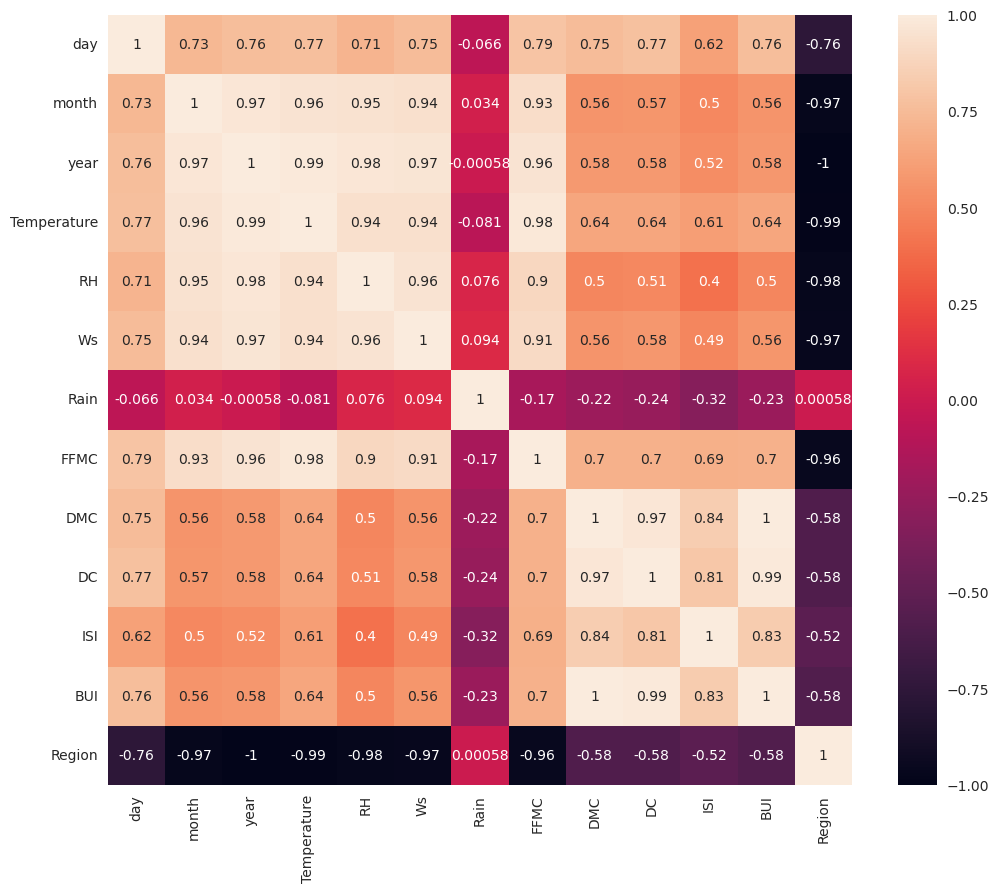

In [131]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [132]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [133]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

/tmp/ipykernel_1313/3235405206.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [134]:
corr_features

{'BUI', 'DC', 'FFMC', 'RH', 'Region', 'Temperature', 'Ws', 'year'}

In [135]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((185, 6), (62, 6))

In [136]:
X_train.columns

Index(['day', 'month', 'Rain', 'DMC', 'ISI', 'Classes'], dtype='object')

In [139]:
X_train.drop["Classes"]

TypeError: 'method' object is not subscriptable

## Feature Scaling or Standardization

In [137]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.tranform(X_test)

ValueError: could not convert string to float: 'not fire'